In [7]:
using FUSE
FUSE.logging(Logging.Info; actors=Logging.Debug);

top_dir = "/home/weisbergd/julia_dev/FUSE/playground/weisberg_FPP_opt/nominal/opt_betaN_cost__Solovev_Kr_flattop24_HTS0.1_qpol2.75_A3.5_Zeff2.0/opt_runs/"

run_dir = "4__2023-08-04T12:18:30.386__3475987"
run_dir = "2__2023-08-04T12:01:01.288__3253146"

dd, ini, act = FUSE.load(top_dir*run_dir);


┌ Error: reading act.ActorDivertors.impurities : TypeError(:setfield!, "", Union{Missing, Vector{Symbol}}, Float64[])
└ @ SimulationParameters ~/.julia/dev/SimulationParameters/src/utils.jl:92


In [8]:
function my_workflow(ini::FUSE.ParametersInits, act::FUSE.ParametersActors)
    
    ### modify ini layers
    
    R0 = ini.equilibrium.R0
    ϵ = ini.equilibrium.ϵ
    a = R0 * ϵ

    RiPlasma = R0 - a
    
    # HFS layers

    ini.build.layers[:plasma] = 2*a*(1+ini.build.plasma_gap)
    ini.build.layers[:hfs_first_wall] = 0.02
    ini.build.layers[:hfs_blanket] = 0.55*((1/ϵ-1.8)/2.2)^0.5
    ini.build.layers[:hfs_high_temp_shield] = RiPlasma*0.05
    ini.build.layers[:hfs_gap_high_temp_shield_vacuum_vessel] = RiPlasma * 0.02
    ini.build.layers[:hfs_vacuum_vessel] = RiPlasma * 0.05
    ini.build.layers[:hfs_gap_vacuum_vessel_low_temp_shield] = RiPlasma * 0.02
    ini.build.layers[:hfs_low_temp_shield] = 0.45-0.15*((1/ϵ-1.8)/2.2)^0.5
    ini.build.layers[:hfs_gap_low_temp_shield_TF] = RiPlasma * 0.02

    rbCenterPost = (R0 - 0.5*ini.build.layers[:plasma] - ini.build.layers[:hfs_first_wall] - ini.build.layers[:hfs_blanket]
        - ini.build.layers[:hfs_high_temp_shield] - ini.build.layers[:hfs_gap_high_temp_shield_vacuum_vessel]
        - ini.build.layers[:hfs_vacuum_vessel] - ini.build.layers[:hfs_gap_vacuum_vessel_low_temp_shield]
        - ini.build.layers[:hfs_low_temp_shield] - ini.build.layers[:hfs_gap_low_temp_shield_TF]);

    ini.build.layers[:hfs_TF] = rbCenterPost * 0.25
    ini.build.layers[:OH] = rbCenterPost * 0.25
    ini.build.layers[:gap_TF_OH] = RiPlasma * 0.02
    ini.build.layers[:gap_OH] = rbCenterPost - ini.build.layers[:hfs_TF] - ini.build.layers[:gap_TF_OH] - ini.build.layers[:OH]

    # LFS layers

    ini.build.layers[:lfs_first_wall] = 0.02
    ini.build.layers[:lfs_blanket] = 1.0 - 0.25*((1/ϵ-2.1)/1.9)^0.5
    ini.build.layers[:lfs_high_temp_shield] = RiPlasma * 0.05
    ini.build.layers[:lfs_gap_high_temp_shield_vacuum_vessel] = RiPlasma * 0.2
    ini.build.layers[:lfs_vacuum_vessel] = RiPlasma * 0.05
    ini.build.layers[:lfs_gap_vacuum_vessel_low_temp_shield] = RiPlasma * 0.02
    ini.build.layers[:lfs_low_temp_shield] = 0.45-0.15*((1/ϵ-1.8)/2.2)^0.5
    ini.build.layers[:lfs_gap_low_temp_shield_TF] = RiPlasma * 0.02
    ini.build.layers[:lfs_TF] = ini.build.layers[:hfs_TF]
    
    ### run init
    
    dd = FUSE.init(ini, act)
    
    ### run main compound actor
    
    FUSE.ActorWholeFacility(dd, act)
    
    return dd
end

my_workflow (generic function with 1 method)

In [9]:
act.ActorHFSsizing.do_plot = true
act.ActorHFSsizing.verbose = true

true

[ Info: Equilibrium
[ Info:  Solovev
[ Info: HCD
[ Info:  ECsimple
[ Info:  ICsimple
[ Info:  LHsimple
[ Info:  NBsimple
[ Info: SteadyStateCurrent
[ Info: CXbuild
[ Info: WholeFacility
[ Info:  EquilibriumTransport
[ Info:   HCD
[ Info:    ECsimple
[ Info:    ICsimple
[ Info:    LHsimple
[ Info:    NBsimple
[ Info:   Current
[ Info:    SteadyStateCurrent
[ Info:   CoreTransport
[ Info:    FixedProfiles
[ Info:     Pedestal
[ Info:   HCD
[ Info:    ECsimple
[ Info:    ICsimple
[ Info:    LHsimple
[ Info:    NBsimple
[ Info:   Current
[ Info:    SteadyStateCurrent
[ Info:   Equilibrium
[ Info:    Solovev
[ Info:   CoreTransport
[ Info:    FixedProfiles
[ Info:     Pedestal
[ Info:   HCD
[ Info:    ECsimple
[ Info:    ICsimple
[ Info:    LHsimple
[ Info:    NBsimple
[ Info:   Current
[ Info:    SteadyStateCurrent
[ Info:   Equilibrium
[ Info:    Solovev
[ Info:   CoreTransport
[ Info:    FixedProfiles
[ Info:     Pedestal
[ Info:   HCD
[ Info:    ECsimple
[ Info:    ICsimple
[ Info:    L

 * Status: success

 * Candidate solution
    Final objective value:     2.122164e+02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   12  (vs limit Inf)
    Iterations:    492
    f(x) calls:    915


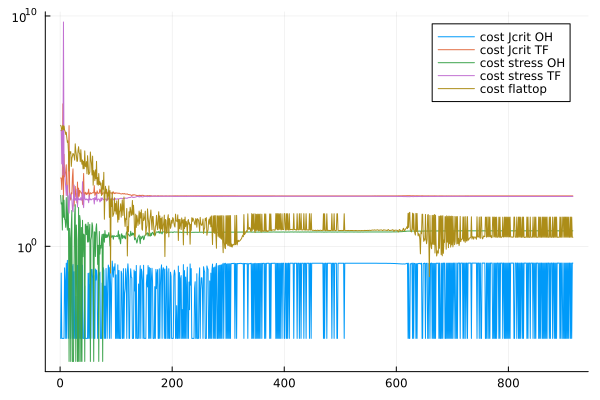

[PL.thickness] = [1.0275658716175973]
[OH.thickness, dd.build.oh.technology.fraction_steel] = [0.29179182318555874, 0.6862468638548185]
[TFhfs.thickness, dd.build.tf.technology.fraction_steel] = [3.6441827883667886, 0.5717639516609757]

target_B0 = 19.519586587926625
(dd.build.tf.max_b_field * TFhfs.end_radius) / R0 = 19.519586587926625

dd.build.oh.flattop_duration = 86613.66771722295
dd.requirements.flattop_duration = 86400.0

dd.build.oh.max_j = 5.05961279498394e7
dd.build.oh.critical_j = 7.575317479743423e7

dd.build.tf.max_j = 1.3619164180095255e7
dd.build.tf.critical_j = 1.0579604813760454e7

maximum(dd.solid_mechanics.center_stack.stress.vonmises.oh) = 1.096183090440123e9
dd.solid_mechanics.center_stack.properties.yield_strength.oh = 8.0e8

maximum(dd.solid_mechanics.center_stack.stress.vonmises.tf) = 4.746189404307279e9
dd.solid_mechanics.center_stack.properties.yield_strength.tf = 8.0e8

old_R0 / a = 3.1118975123406565
R0 / a = 3.1118975123406565


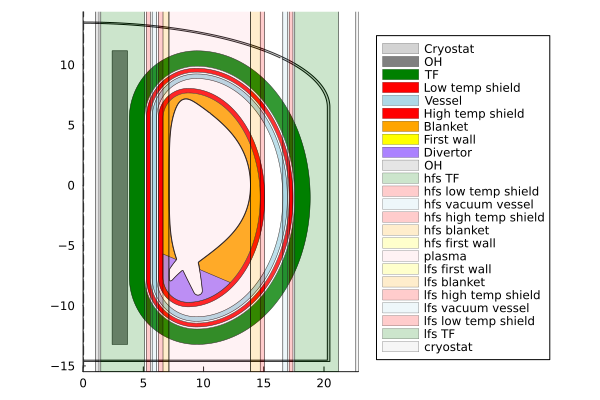

[ Info:  LFSsizing
[ Info:  CXbuild
[ Info:  PassiveStructures
[ Info:  Neutronics
[ Info:  Blanket
[ Info:   CXbuild
[ Info:  Divertors
[ Info:  BalanceOfPlant
[ Info:   HeatTransfer
[ Info:   ThermalCycle
[ Info:   PowerNeeds
[ Info:  Costing
[ Info:   GASCCosting


 52.613599 seconds (239.76 M allocations: 12.278 GiB, 3.12% gc time, 0.17% compilation time)


In [10]:
@time dd = my_workflow(ini, act);

In [11]:
FUSE.timer

 ────────────────────────────────────────────────────────────────────────────────
                                        Time                    Allocations      
                               ───────────────────────   ────────────────────────
       Tot / % measured:            9.84h /   0.1%           90.7GiB /  13.5%    

 Section               ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────────────────
 WholeFacility              1    41.8s   79.6%   41.8s   7.71GiB   62.9%  7.71GiB
   EquilibriumTrans...      1    17.3s   33.1%   17.3s   3.61GiB   29.4%  3.61GiB
     Equilibrium            3    12.5s   23.8%   4.16s   3.10GiB   25.3%  1.03GiB
       Solovev              3    12.2s   23.3%   4.07s   3.09GiB   25.2%  1.03GiB
     HCD                    4    647ms    1.2%   162ms   2.84MiB    0.0%   726KiB
       ECsimple             4   13.8ms    0.0%  3.46ms    357KiB    0.0%  89.3KiB
       ICsimple

GEOMETRY                        EQUILIBRIUM                     TEMPERATURES                    DENSITIES                       
────────────────────────────    ────────────────────────────    ────────────────────────────    ────────────────────────────    
R0 → 10.5 [m]                   B0 → 19.5 [T]                   Te0 → 33.8 [keV]                ne0 → 3.59e+19 [m⁻³]            
a → 3 [m]                       ip → 9.63 [MA]                  Ti0 → 27.8 [keV]                ne_ped → 2.41e+19 [m⁻³]         
1/ϵ → 3.5 [m]                   q95 → 36.4                      <Te> → 14.2 [keV]               <ne> → 2.98e+19 [m⁻³]           
κ → 2.15                        <Bpol> → 0.382 [T]              <Ti> → 11.9 [keV]               ne0/<ne> → 1.2                  
δ → 0.688                       βpol_MHD → 2.46                 Te0/<Te> → 2.37                 fGW → 0.94                      
ζ → -0.075                      βtor_MHD → 0.00101              Ti0/<Ti> → 2.34                 z

​


24×9 DataFrame
 Row │ group   details     type      ΔR         R_start   R_end     material      area        volume     
     │ String  String      String    Float64    Float64   Float64   String        Float64     Float64    
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                            1.02757     0.0       1.02757                 30.684        99.054
   2 │ in                  oh        0.291792    1.02757   1.31936  ReBCO           8.71316      64.2428
   3 │ in                            0.150268    1.31936   1.46963                  4.48713      39.3156
   4 │ hfs                 tf        3.64418     1.46963   5.11381  ReBCO         258.566      8307.97
   5 │ hfs                           0.150268    5.11381   5.26408                  9.76459     722.076
   6 │ hfs     low temp    shield    0.318203    5.26408   5.58228  Steel          18.2967     1275.02
   7 │ hfs                           0.1502

​


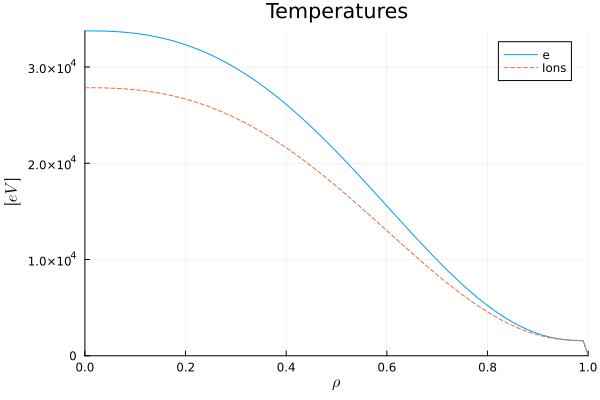

​


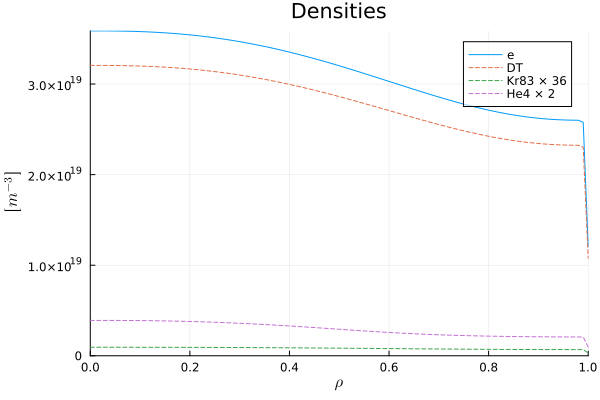

​


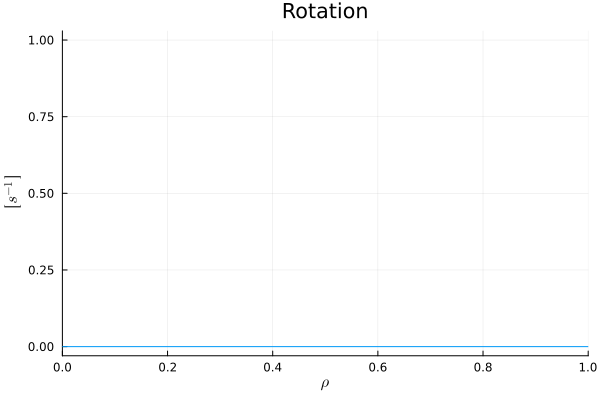

​


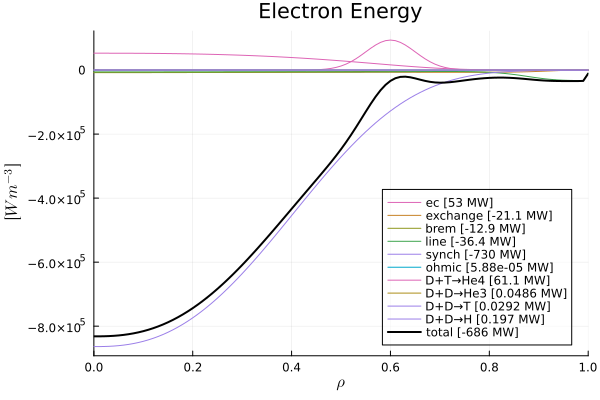

​


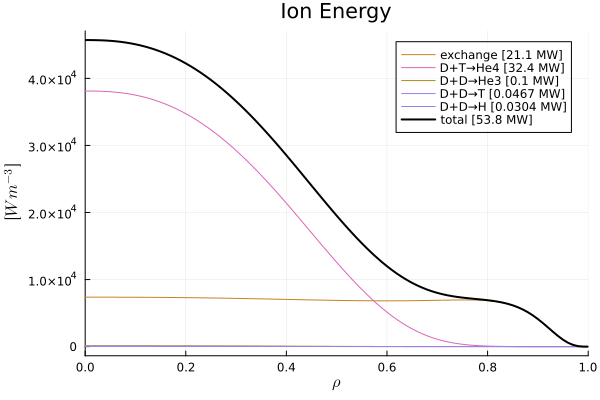

​


​


​


​


​


In [12]:
FUSE.digest(dd);